In [17]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from keras.models import Sequential
from keras import layers
from keras.layers import Embedding
from keras.optimizers import Adam

import seaborn as sns
sns.set(style = 'whitegrid')

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
df = pd.read_csv('../Cleaning/Clean_Dataset.csv', encoding='UTF-8')

In [19]:
train = df[['Clean_Text','Stop_Words_Text', 'Stemmed_Text', 'indonlp_sentiment', 'Lexicon_Score']]

In [20]:
train = df[['Clean_Text', 'indonlp_sentiment']]

#### Data Preprocessing

In [21]:
data = df['Clean_Text'].values.tolist()

### Building a Model

#### Label Encoding of Output

In [22]:
import tensorflow as tf
labels = np.array(train['indonlp_sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

#### Tokenizing dan Padding

In [23]:
max_words = 50000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[    0     0     0 ...    29    43     1]
 [    0     0     0 ...    57   218  1485]
 [    0     0     0 ...  1555    10    45]
 ...
 [    0     0     0 ...  1002     5   438]
 [    0     0     0 ...  1914   751 14964]
 [    0     0     0 ...   195     2   630]]


#### Split Dataset

In [55]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size = 0.2, random_state = 42)
a, X_val, b, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32974, 100) (32974, 3)
(8244, 100) (8244, 3)


#### LSTM

In [60]:
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Embedding, BatchNormalizatio n, Bidirectional, LSTM, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# Assuming you have X_train, y_train, X_val, y_val already prepared

# Convert y_train and y_val to one-hot encoded format for categorical_crossentropy loss

# Define a function to create the Keras model
def create_model(learning_rate=0.001, units=20, dropout=0.3):
    model = Sequential()
    model.add(Embedding(max_words, 40, input_length=max_len))
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(units, dropout=dropout)))
    model.add(Dense(3, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper
model_wrapper = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)

# Define the parameters for the grid search
param_grid = {
    'learning_rate': [0.001, 0.01],
    'units': [20,32,40, 50],
    'dropout': [0.2, 0.25,0.3,0.4,]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model_wrapper, param_grid=param_grid, cv=3)

# Fit the model with the grid search
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val))

# Get the best parameters and best score
best_params = grid_result.best_params_
best_score = grid_result.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_score)


C:\Users\Juniarta\AppData\Local\Temp\ipykernel_2288\4217622686.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)


Best parameters: {'dropout': 0.25, 'learning_rate': 0.001, 'units': 20}
Best accuracy: 0.7464365164438883


In [69]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.BatchNormalization())
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.25)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

#### Train the Model

In [70]:
history = model2.fit(X_train,y_train, epochs=20,validation_data=(X_val, y_val))

Epoch 1/20
1031/1031 [==============================] - 92s 80ms/step - loss: 0.6475 - accuracy: 0.7307 - val_loss: 0.3741 - val_accuracy: 0.8600
Epoch 2/20
1031/1031 [==============================] - 77s 75ms/step - loss: 0.3863 - accuracy: 0.8480 - val_loss: 0.2110 - val_accuracy: 0.9287
Epoch 3/20
1031/1031 [==============================] - 77s 74ms/step - loss: 0.2458 - accuracy: 0.9084 - val_loss: 0.1289 - val_accuracy: 0.9554
Epoch 4/20
1031/1031 [==============================] - 77s 74ms/step - loss: 0.1709 - accuracy: 0.9361 - val_loss: 0.0896 - val_accuracy: 0.9696
Epoch 5/20
1031/1031 [==============================] - 77s 75ms/step - loss: 0.1289 - accuracy: 0.9521 - val_loss: 0.0700 - val_accuracy: 0.9762
Epoch 6/20
1031/1031 [==============================] - 76s 74ms/step - loss: 0.1013 - accuracy: 0.9620 - val_loss: 0.0551 - val_accuracy: 0.9811
Epoch 7/20
1031/1031 [==============================] - 78s 76ms/step - loss: 0.0852 - accuracy: 0.9686 - val_loss: 0.0401 -

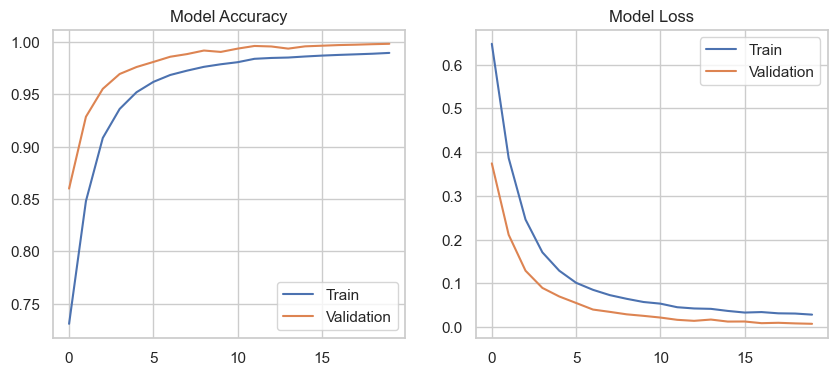

In [71]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    #first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].legend(['Train', 'Validation'], loc='best')
    #second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].legend(['Train', 'Validation'], loc='best')

plot_training_hist(history)

In [72]:
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.BatchNormalization())
model.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

258/258 [==============================] - 4s 15ms/step
Model Accuracy on Test Data: 0.9349830179524503


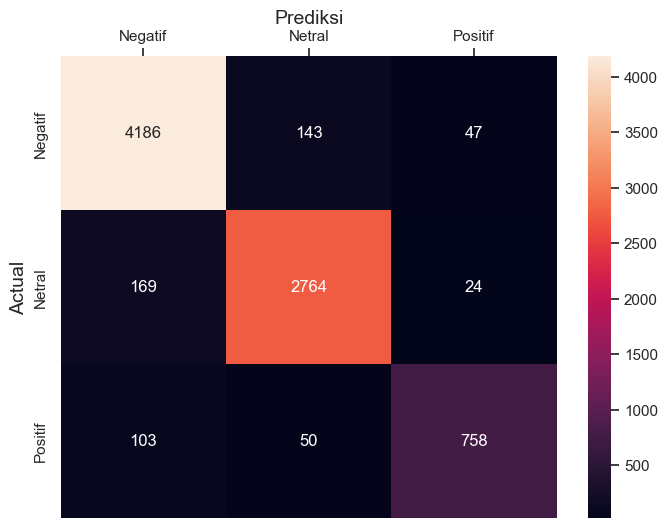

In [87]:
# Predict sentiment on data test by using model has been created, and then visualize a confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print('Model Accuracy on Test Data:', accuracy)
confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true=y_true, y_pred=y_pred), fmt='g', annot=True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediksi', fontsize=14)
ax.set_xticklabels(['Negatif', 'Netral', 'Positif'])
ax.set_ylabel('Actual', fontsize=14)
ax.set_yticklabels(['Negatif', 'Netral', 'Positif'])
plt.show()

In [74]:
# predict classes for test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# convert one-hot encoded true labels to integer class labels
y_test_int = np.argmax(y_test, axis=1)

# calculate metrics
print(classification_report(y_test_int, y_pred))

# calculate confusion matrix
conf_mat = confusion_matrix(y_test_int, y_pred)
print(conf_mat)


258/258 [==============================] - 4s 10ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4376
           1       0.93      0.93      0.93      2957
           2       0.91      0.83      0.87       911

    accuracy                           0.93      8244
   macro avg       0.93      0.91      0.92      8244
weighted avg       0.93      0.93      0.93      8244

[[4186  143   47]
 [ 169 2764   24]
 [ 103   50  758]]


In [75]:
# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test_int, y_pred)
precision = precision_score(y_test_int, y_pred, average='macro')
recall = recall_score(y_test_int, y_pred, average='macro')
f1 = f1_score(y_test_int, y_pred, average='macro')

In [76]:
# Print the results
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Precision: {:.2f}%'.format(precision * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print('F1-score: {:.2f}%'.format(f1 * 100))

Accuracy: 93.50%
Precision: 92.94%
Recall: 90.78%
F1-score: 91.79%


In [73]:
history2 = model.fit(tweets,labels, epochs=15,validation_split=0.2)

Epoch 1/15
1031/1031 [==============================] - 95s 82ms/step - loss: 0.7219 - accuracy: 0.6915 - val_loss: 0.5883 - val_accuracy: 0.7746
Epoch 2/15
1031/1031 [==============================] - 78s 76ms/step - loss: 0.5336 - accuracy: 0.7841 - val_loss: 0.5782 - val_accuracy: 0.7829
Epoch 3/15
1031/1031 [==============================] - 79s 76ms/step - loss: 0.4408 - accuracy: 0.8232 - val_loss: 0.5808 - val_accuracy: 0.7860
Epoch 4/15
1031/1031 [==============================] - 81s 79ms/step - loss: 0.3704 - accuracy: 0.8556 - val_loss: 0.6122 - val_accuracy: 0.7854
Epoch 5/15
1031/1031 [==============================] - 79s 77ms/step - loss: 0.3209 - accuracy: 0.8762 - val_loss: 0.6158 - val_accuracy: 0.7859
Epoch 6/15
1031/1031 [==============================] - 78s 75ms/step - loss: 0.2781 - accuracy: 0.8934 - val_loss: 0.6825 - val_accuracy: 0.7819
Epoch 7/15
1031/1031 [==============================] - 79s 77ms/step - loss: 0.2488 - accuracy: 0.9051 - val_loss: 0.7228 -

#### Prediksi dan Hasil

In [77]:
new_df = pd.read_csv('../Classification/Nov-Dec_2022.csv', encoding = 'UTF-8')

In [78]:
sentiment = ['Neutral', 'Negative', 'Positive']

In [79]:
def predict(text):
    sequence = tokenizer.texts_to_sequences(text)
    test = pad_sequences(sequence, maxlen = max_len)
    result =sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]
    return result

In [84]:
new_df['sentiment'] = new_df['Clean_Text'].apply(lambda x: predict(x))

1/1 [==============================] - 0s 34ms/step


2/2 [==============================] - 0s 11ms/step


4/4 [==============================] - 0s 14ms/step


6/6 [==============================] - 0s 14ms/step


2/2 [==============================] - 0s 13ms/step


3/3 [==============================] - 0s 11ms/step


3/3 [==============================] - 0s 10ms/step


In [85]:
new_df['sentiment'].value_counts()

Neutral     1359
Negative     157
Positive      58
Name: sentiment, dtype: int64

In [86]:
new_df.to_csv('../Classification/Nov-Dec_2022.csv')

In [30]:
sentiment = ['Neutral', 'Negative', 'Positive']

In [31]:
sequence = tokenizer.texts_to_sequences(['metaverse teknologi yang sangat buruk'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 157ms/step


'Negative'

In [32]:
sequence = tokenizer.texts_to_sequences(['wow metaverse teknologi yang sangat menjanjikan'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 52ms/step


'Positive'

In [33]:
sequence = tokenizer.texts_to_sequences(['kita lihat saja bagaimana perkembangan teknologi tersebut'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 41ms/step


'Neutral'